In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Importa los datos
peliculas = pd.read_csv('Seccion_6_Tarea_Datos.csv', encoding = 'latin1')

In [3]:
# Explora los datos
peliculas.head()

,Dia de la Semana,Director,Genero,Pelicula,Dia Lanzamiento,Estudio,Ingreso Bruto Ajustado ($mill),Presupuesto ($mill),Ingreso Bruto ($mill),Rating IMDB,Rating MovieLens,Ingresos Fuera de Estados Unidos ($mill),Ingresos Fuera de Estados Unidos %,Utilidad ($mill),Utilidad %,Duracion (min),Ingresos USA ($mill),Ingresos % USA
0,Friday,Brad Bird,accion,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,accion,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,accion,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedia,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,accion,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6


In [4]:
# Revisa el resumen del DataFrame
peliculas.describe()

,Presupuesto ($mill),Rating IMDB,Rating MovieLens,Ingresos Fuera de Estados Unidos %,Utilidad %,Duracion (min),Ingresos USA ($mill),Ingresos % USA
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000
mean,92.467928,6.923849,3.340378,57.698849,719.278783,117.781250,167.135197,42.301151
std,59.421407,0.925890,0.454071,12.334237,1942.807248,23.179122,92.465903,12.334237
min,0.600000,3.600000,1.490000,17.200000,7.700000,30.000000,0.000000,0.000000
25%,45.000000,6.375000,3.037500,49.900000,201.850000,100.000000,106.950000,33.700000
50%,80.000000,6.900000,3.365000,58.200000,338.550000,116.000000,141.700000,41.800000
75%,130.000000,7.600000,3.672500,66.300000,650.100000,130.250000,202.100000,50.100000
max,300.000000,9.200000,4.500000,100.000000,41333.300000,238.000000,760.500000,82.800000


In [5]:
# Revisa la estructura del DataFrame
peliculas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 18 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Dia de la Semana                          608 non-null    object 
 1   Director                                  608 non-null    object 
 2   Genero                                    608 non-null    object 
 3   Pelicula                                  608 non-null    object 
 4   Dia Lanzamiento                           608 non-null    object 
 5   Estudio                                   608 non-null    object 
 6   Ingreso Bruto Ajustado ($mill)            608 non-null    object 
 7   Presupuesto ($mill)                       608 non-null    float64
 8   Ingreso Bruto ($mill)                     608 non-null    object 
 9   Rating IMDB                               608 non-null    float64
 10  Rating MovieLens                      

In [6]:
# Explora la variable categórica Estudio, usada en el reto
#peliculas.Estudio = peliculas.Estudio.astype('category')

In [7]:
# Explora la variable categórica Género, usada en el reto
#peliculas.Genero = peliculas.Genero.astype('category')

In [8]:
# Filtra el DataFrame por Género
peliculas2 = peliculas[(peliculas.Genero == 'accion') | (peliculas.Genero == 'aventura') | (peliculas.Genero == 'animacion') | (peliculas.Genero == 'comedia') | (peliculas.Genero == 'drama')]



In [9]:
# Filtra el DataFrame por Estudio
peliculas3 = peliculas2[(peliculas2.Estudio == 'Buena Vista Studios') | (peliculas2.Estudio == 'Fox') | (peliculas2.Estudio == 'Paramount Pictures') | (peliculas2.Estudio == 'Sony') | (peliculas2.Estudio == 'Universal') | (peliculas2.Estudio == 'WB')]

In [10]:
# Revisa que los filtros se hayan aplicado
print (peliculas3.Genero.unique())
print (peliculas3.Estudio.unique())
print (len(peliculas3))

['accion' 'comedia' 'aventura' 'animacion' 'drama']
['Buena Vista Studios' 'Sony' 'Universal' 'WB' 'Paramount Pictures' 'Fox']
423


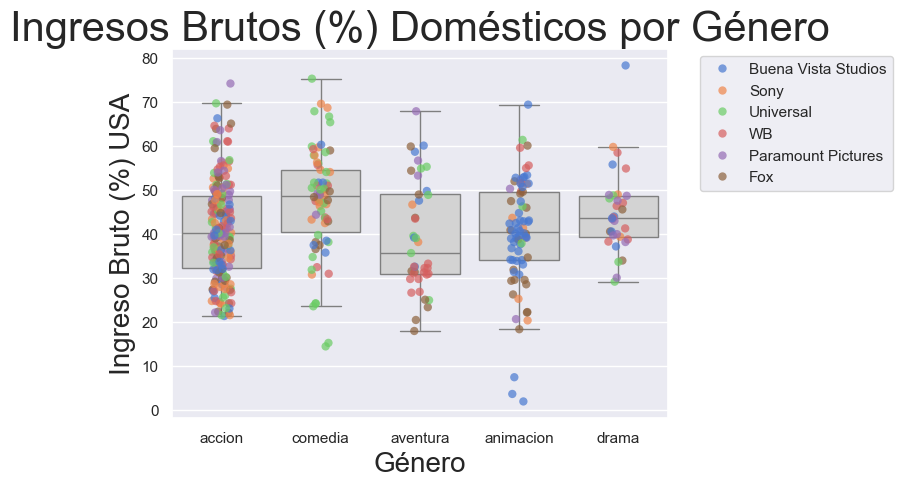

In [11]:
# Define el estilo
sns.set(style="darkgrid", palette="muted", color_codes=True)

# Gráfica los boxplots
ax = sns.boxplot(data=peliculas3, x='Genero', y='Ingresos % USA', \
                 orient='v', color='lightgray', showfliers=False)
plt.setp(ax.artists, alpha=0.5)

# Agrega los puntos para mostrar cada observación
sns.stripplot(data= peliculas3, x='Genero', y='Ingresos % USA',  jitter=True, size=6, linewidth=0, hue = 'Estudio', alpha=0.7)

ax.axes.set_title('Ingresos Brutos (%) Domésticos por Género',fontsize=30)
ax.set_xlabel('Género',fontsize=20)
ax.set_ylabel('Ingreso Bruto (%) USA',fontsize=20)

# Define el lugar de la leyenda
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [ ]:
plt.legend